<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/ex_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
#remplacer le chemin
NON_VAR = ['WIFE_AGE','WIFE_EDU','HUSB_EDU','NUM_OF_CHILD','WIFE_RELI','WIFE_WORK','HUSB_OCUP','STA_OF_LIV','MEDIA_EXP','CONTRACEPTIVE']

donnee= pd.read_csv("Downloads\cmc.data.txt",sep=',',header=None,names=NON_VAR)


In [0]:
donnee


,WIFE_AGE,WIFE_EDU,HUSB_EDU,NUM_OF_CHILD,WIFE_RELI,WIFE_WORK,HUSB_OCUP,STA_OF_LIV,MEDIA_EXP,CONTRACEPTIVE
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [0]:
donnee['CONTRACEPTIVE'].value_counts()

1    629
3    511
2    333
Name: CONTRACEPTIVE, dtype: int64

In [0]:
donnee.columns

Index(['WIFE_AGE', 'WIFE_EDU', 'HUSB_EDU', 'NUM_OF_CHILD', 'WIFE_RELI',
       'WIFE_WORK', 'HUSB_OCUP', 'STA_OF_LIV', 'MEDIA_EXP', 'CONTRACEPTIVE'],
      dtype='object')

In [0]:
features = [o for o in donnee.columns if o !='CONTRACEPTIVE']
X = donnee[features]
Y = donnee['CONTRACEPTIVE']



In [0]:
import numpy as np
Y_red = np.where(Y==1,0,1)

In [0]:
import pandas as pd
a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']
for var in a_dummies:
    X.loc[var] = X.loc[:,var].copy().astype(str)
X_dum = pd.get_dummies(X[a_dummies])
X_dum=X_dum.head(1473)
X_dum

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,STA_OF_LIV,WIFE_EDU_1.0,WIFE_EDU_2.0,WIFE_EDU_3.0,WIFE_EDU_4.0,WIFE_EDU_nan,HUSB_EDU_1.0,HUSB_EDU_2.0,HUSB_EDU_3.0,HUSB_EDU_4.0,HUSB_EDU_nan,HUSB_OCUP_1.0,HUSB_OCUP_2.0,HUSB_OCUP_3.0,HUSB_OCUP_4.0,HUSB_OCUP_nan
0,3.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,4.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,4.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,3.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,2.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,4.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1469,4.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1470,4.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1471,2.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [0]:
A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]
X = pd.concat([X,X_dum],axis=1)
X = X.head(1473)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#exo1
#1
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y_red,random_state=1998,test_size=0.3)# 0.7 train 0.3 test
X_train

,WIFE_AGE,NUM_OF_CHILD,WIFE_RELI,WIFE_WORK,MEDIA_EXP,STA_OF_LIV,WIFE_EDU_1.0,WIFE_EDU_2.0,WIFE_EDU_3.0,WIFE_EDU_4.0,...,HUSB_EDU_1.0,HUSB_EDU_2.0,HUSB_EDU_3.0,HUSB_EDU_4.0,HUSB_EDU_nan,HUSB_OCUP_1.0,HUSB_OCUP_2.0,HUSB_OCUP_3.0,HUSB_OCUP_4.0,HUSB_OCUP_nan
1184,29.0,2.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
583,24.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
831,29.0,5.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
668,33.0,3.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1270,41.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,47.0,4.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1188,26.0,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
897,47.0,4.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
673,45.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
#2
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',random_state=1998,solver='lbfgs',max_iter=1000, multi_class='auto')


In [0]:
#3
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1998, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#4
Y_pred = clf.predict(X_test)

In [0]:
#5
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6628959276018099

In [0]:
#6
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[ 89, 102],
       [ 47, 204]], dtype=int64)

In [0]:
#7
Y_pred_prob = clf.predict_proba(X_test)

In [0]:
#8
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])





0.7196554097745145

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,clf.predict_proba(X_test)[:,1])
auc(fpr,tpr)


0.7196554097745145

In [0]:
#9
import numpy as np
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show()

<Figure size 640x480 with 1 Axes>

In [0]:
#exo2
#1
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y_red,random_state=1998,test_size=0.3)


In [0]:
#2
from sklearn.tree import DecisionTreeClassifier
arbre= DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2)

In [0]:
#3
arbre.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#4
Y_pred = arbre.predict(X_test)

In [0]:
#5
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)



0.6968325791855203

In [0]:
#6
from sklearn.tree import DecisionTreeClassifier
arbrebis= DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_split=4,min_samples_leaf=3)
arbrebis.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#7
Y_predbis = arbrebis.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predbis)

0.6945701357466063

In [0]:
#8
Y_pred_probbis = arbrebis.predict_proba(X_test)

In [0]:
#9
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,arbrebis.predict_proba(X_test)[:,1])


0.7428401576938319

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,arbrebis.predict_proba(X_test)[:,1])
auc(fpr,tpr)

0.7428401576938319

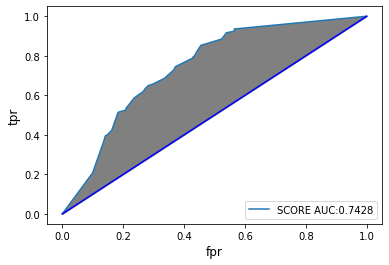

In [0]:
#10
import numpy as np
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show()

In [0]:
#11
import numpy as np
importance = arbrebis.feature_importances_
nom_feature = X_train.columns
index = np.argsort(importance)[::-1]
nom_feature_ord = nom_feature[index]
importance_ord = np.round(100*importance[index],2)

([<matplotlib.axis.XTick at 0x58dc97e408>,
 <a list of 105 Text xticklabel objects>)

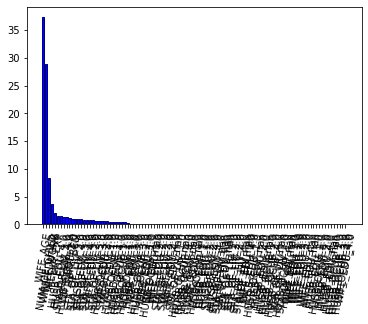

In [0]:
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(nom_feature_ord))

plt.bar(y_pos,importance_ord,edgecolor='navy',color='blue')
plt.xticks(y_pos,nom_feature_ord,color='black',rotation=80)

<function matplotlib.pyplot.show(*args, **kw)>

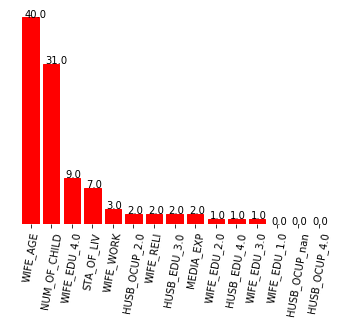

In [0]:
NON_FEATURES = X_train.columns
import numpy as np
IMPORTANCE_FEATURES = 100*np.round(arbrebis.feature_importances_,2)
loca = np.arange(len(IMPORTANCE_FEATURES))
index = np.argsort(IMPORTANCE_FEATURES)[::-1]
#on ordonne
IMPORTANCE_FEATURES = IMPORTANCE_FEATURES[index][0:15]
NON_FEATURES = NON_FEATURES[index][0:15]
loca = loca[0:15]
import matplotlib.pyplot as plt
plt.bar(loca,IMPORTANCE_FEATURES,edgecolor='red',color='red')
plt.yticks([])
plt.xticks(loca,NON_FEATURES,color='black',rotation=80)
plt.box(False)
for i in range(0,len(NON_FEATURES)):
    plt.text(loca[i]-0.3,IMPORTANCE_FEATURES[i],str(np.round(IMPORTANCE_FEATURES[i],1)))
plt.show

In [0]:
#exo3
#1
from sklearn.ensemble import RandomForestClassifier
randfo = RandomForestClassifier(n_estimators=300, criterion='gini',random_state=1998,max_depth=9,min_samples_split=3,min_samples_leaf=2,max_features=0.7)
randfo.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1998,
                       verbose=0, warm_start=False)

In [0]:
#2
#c'est le nombre de features qu'on veut pour optimiser la division des données de type test et train

In [0]:
#3
Y_pred3= randfo.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred3)

0.7262443438914027

In [0]:
#4
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,randfo.predict_proba(X_test)[:,1])


0.7777893660958262